# Impacts of Coronavirus on the Economy and the Media

*Outline of project*

We have 4 data sources to analyze.
1. Part One - The Stock Market (using a financial API)
2. Part Two - The Media (using html data)
3. Part Three - Unemployment (using a csv file)
4. Part Four - Coronavirus (using a csv file)

Parts 1 and 2 have extensive analysis. Parts 3 and 4 are shorter which is why I have 4 data sources instead
of 3.

# Part 1: The Stock Market
First let's analyze how the stock market has been impacted

We will use the API: financialmodelingprep.com/api

In [206]:
# import necessary modules
import requests
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

Lets look at the four big technology companies (Appple, Amazon, Google, Facebook) to get a general feel as to how
stocks have been impacted

In [207]:
# Apple

aapl = requests.get("https://financialmodelingprep.com/api/v3/historical-price-full/AAPL?serietype=line").json()
aapl = aapl['historical']
aapldf = pd.DataFrame(aapl) 
            # here we used the .DataFrame method which converts data into a dataframe.
            # I did this so I could do greater and easier analysis on the data
            # I learned this from stack overflow
aapldf = aapldf.tail(79)
aapldf = aapldf.set_index("date")
            # here we used the .set_index method which allows us to take a column
            # of the dataframe and make that the index
            # I am doing this because I like the look of the df better like that
            # and it will also come in handy later on when we concatenate different dataframes
            # I learned this from stack overflow

# Here we had to pull the json data from the api, then we got into the data 
# we wanted by going into the 'historical' key of the returned dictionary. 
# We then turned the data into a pandas dataframe. Then we grabbed the final
# 77 items of the dataframe because this took us back to the first trading day
# of the year on January 2nd.
# Finally we set the index of the datafame to the date column to make things 
# easier for us in our future code.

# This code will repeat for the following 3 companies, so these comments apply
# there as well

def _color_red_or_green(val):    
    color = 'red' if val < 270 else 'green'  
    return 'color: %s' % color
aapldf[["close"]].style.applymap(_color_red_or_green)

# This is copied code from Jess' lecture on dataviz
# Only thing that changes is the number. I chose the somewhat arbitrary
# number of 270 so that you can easily see the dip in mid to late March

# I acknowledge that Data Tables may not be the greatest visualization for this particular 
# data because depending on the number chosen, you can easily make the data look different.
# However, I decided that this would be a more interesting way of looking at the dataframes
# considering we will further explore the data later

,close
date,
2020-01-09,309.63
2020-01-10,310.33
2020-01-13,316.96
2020-01-14,312.68
2020-01-15,311.34
2020-01-16,315.24
2020-01-17,318.73
2020-01-21,316.57
2020-01-22,317.7


In [208]:
# Amazon
amzn = requests.get("https://financialmodelingprep.com/api/v3/historical-price-full/AMZN?serietype=line").json()
amzn = amzn['historical']
amznDF = pd.DataFrame(amzn)
amznDF = amznDF.tail(79)
amznDF.set_index("date")
amznDF = amznDF.set_index("date")

def _color_red_or_green(val):
    color = 'red' if val < 1900 else 'green'
    return 'color: %s' % color
amznDF[["close"]].style.applymap(_color_red_or_green)

,close
date,
2020-01-09,1901.05
2020-01-10,1883.16
2020-01-13,1891.3
2020-01-14,1869.44
2020-01-15,1862.02
2020-01-16,1877.94
2020-01-17,1864.72
2020-01-21,1892
2020-01-22,1887.46


In [209]:
# Facebook
FB = requests.get("https://financialmodelingprep.com/api/v3/historical-price-full/FB?serietype=line").json()
FB = FB['historical']
FBDF = pd.DataFrame(FB)
FBDF = FBDF.tail(79)
FBDF = FBDF.set_index("date")

def _color_red_or_green(val):
    color = 'red' if val < 160 else 'green'
    return 'color: %s' % color
FBDF[["close"]].style.applymap(_color_red_or_green)

,close
date,
2020-01-09,218.3
2020-01-10,218.06
2020-01-13,221.91
2020-01-14,219.06
2020-01-15,221.15
2020-01-16,221.77
2020-01-17,222.14
2020-01-21,221.44
2020-01-22,221.32


In [210]:
# Google
googl = requests.get("https://financialmodelingprep.com/api/v3/historical-price-full/GOOGL?serietype=line").json()
googl = googl['historical']
googlDF = pd.DataFrame(googl)
googlDF = googlDF.tail(77)
googlDF = googlDF.set_index("date")

def _color_red_or_green(val):
    color = 'red' if val < 1200 else 'green'
    return 'color: %s' % color
googlDF[["close"]].style.applymap(_color_red_or_green)

,close
date,
2020-01-13,1440.03
2020-01-14,1430.59
2020-01-15,1439.2
2020-01-16,1450.16
2020-01-17,1479.52
2020-01-21,1482.25
2020-01-22,1483.87
2020-01-23,1484.69
2020-01-24,1466.17


Lets look at all 4 of these stocks next to each other

In [211]:
stocks = pd.concat([aapldf,amznDF,FBDF,googlDF],axis=1, sort=True)   
            # here we used the .concat() method. We did this to make one
            # dataframe from our four stocks. This will allow us to plot
            # all four of them in one plot more easily
            # the axis=1 tells the method to join the data on the rows
            # I learned this from stack overflow
stocks.columns = ['AAPL','AMZN',"FB","GOOGL"]

# Here we concatenated the dataframes so that we could have one big dataFrame with all 4 of the stocks
# then we assigned their respective column names
stocks

,AAPL,AMZN,FB,GOOGL
2020-01-09,309.63,1901.05,218.30,NaN
2020-01-10,310.33,1883.16,218.06,NaN
2020-01-13,316.96,1891.30,221.91,1440.03
2020-01-14,312.68,1869.44,219.06,1430.59
2020-01-15,311.34,1862.02,221.15,1439.20
...,...,...,...,...
2020-04-27,283.17,2376.00,187.50,1270.86
2020-04-28,278.58,2314.08,182.91,1232.59
2020-04-29,287.73,2372.71,194.19,1342.18
2020-04-30,293.80,2474.00,204.71,1346.70


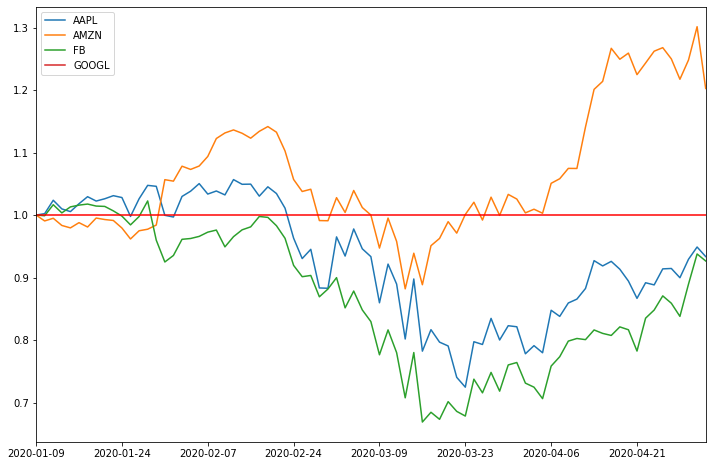

In [212]:
# Here we will plot the stocks cumulative daily returns
# We are plotting the cumalitive daily returns because it is a way of normalizing 
# the data, considering that Apple's stock trades around 275 and Amazon's trades over 2000
# We calculated this by dividing each rows values by the first row. This essentially gives us 
# our percentage returns on our investment if we invested in the stock on the first day of the 
# year and did not sell it.

stockNormed = stocks/stocks.iloc[0]
stockNormed.plot(figsize=(12,8)).axhline(y=1,color="r")

Here we can clearly see that all 4 of the stocks have started to behave very similarly becuase of events from coronavirus. We can make this deduction because before March we can see much more overlap and sporadic behavior between the stocks. Whereas when coronavirus started to gain traction in the US the stocks began to all follow the exact same patterns, just at different price levels.

Also we see that only Amazon has fully recovered from its fall during the coronavirus panic. This may be because a company like Amazon is in *prime* (pun intended) position during the quarintine, considering they deliver items straight to people's doors. 

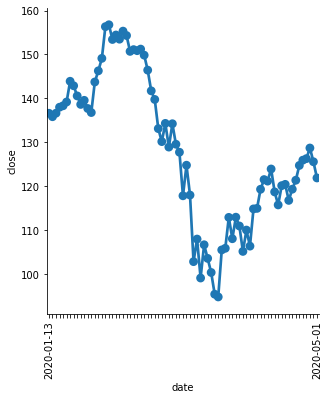

In [213]:
# Let's make a function that allows us to look up the stock prices, and plot them,
# for any stock we pass in

def checkAStock(ticker):
    df = requests.get("https://financialmodelingprep.com/api/v3/historical-price-full/"+ticker+"?serietype=line").json()
    df = df['historical']
    df = pd.DataFrame(df)
    df = pd.DataFrame(df.tail(77))
    catplot = sb.catplot(x="date",y="close",data=df,kind='point').set_xticklabels(rotation=90)
    for label in catplot.ax.xaxis.get_ticklabels()[1:-1]:
        label.set_visible(False)
        
# With this function we pass the given parameter into the request.get method to
# look up the ticker on the API. We then turn this data into a pandas dataframe
# and take the values just from 2020. We then create a seaborn catplot of the data
# and remove the x-labels except for the first and last because they are not really
# needed and they clogged up the plot
    
    
checkAStock("IBM")    # calling the function
    

Now lets look at a popular stock market index: The Dow Jones Industrial Average

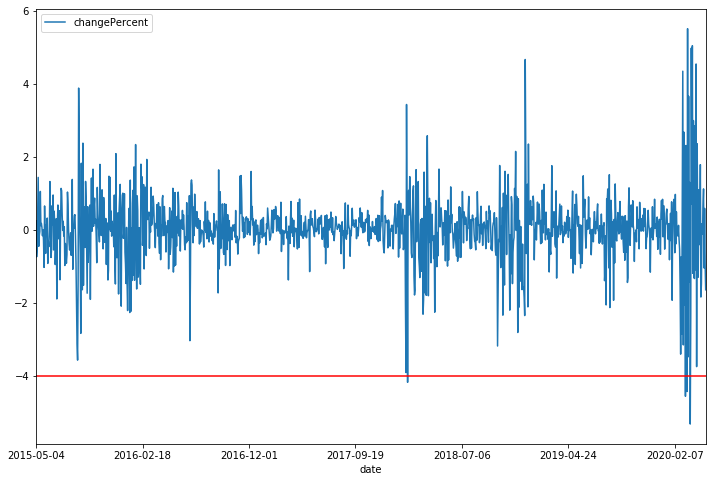

In [214]:
history = requests.get("https://financialmodelingprep.com/api/v3/historical-price-full/index/^DJI").json()['historical']
historyDF = pd.DataFrame(history)
historyDF = historyDF.loc[::-1]
historyDF=historyDF.set_index("date")
DowJonesDF=pd.DataFrame(historyDF["changePercent"])
DowJonesDF.plot(figsize=(12,8)).axhline(y=-4,color="r")

# Here we got the data from the API for the Dow Jones and turned it into
# a pandas dataframe. Originally the dates were in the wrong order for the graph
# so we went back through it with a step size of -1 with .loc
# We set the index to the date column. Finally we plotted just the changePercent
# column

This visualization shows us the massive fluctuation in prices that coronavirus has caused. In investing terms this means there has been massive volatility over the past few weeks. This chart is plotting daily percent changes of the Dow Jones. As you can see, recently we have had many days where the market has increased or decreased by over 4 percent. Let's investigate this further.

In [215]:
djFiltered = DowJonesDF.query("changePercent > 4 or changePercent < -4")
djFiltered

,changePercent
date,
2018-02-08,-4.184
2018-12-26,4.670
2020-03-02,4.349
2020-03-09,-4.567
2020-03-11,-4.273
2020-03-12,-4.436
2020-03-13,5.515
2020-03-20,-5.328
2020-03-24,4.983


It appears that since mid 2015 there have only been 2 instances where the Dow changed by an absolute value of 4.
This tells us just how crazy of a month March was for the stock market, with 9 of these major fluctuations.

In [216]:
plotdj = djFiltered.reset_index()
plotdj = plotdj.iloc[2:]
plotdj = plotdj.sort_values("date")

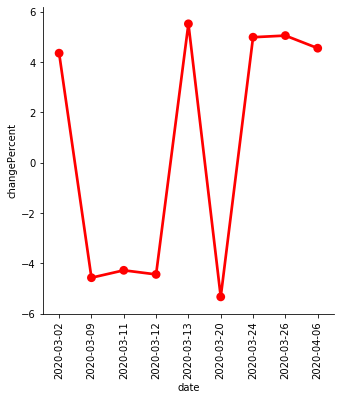

In [217]:
#DowJonesDF.query("changePercent > 4 or changePercent < -4").iloc[0:9].sort_values("date").plot().set_xticklabels(rotation=90)
import seaborn as sb
catplot = sb.catplot(x="date",y="changePercent",data=plotdj,kind='point',color="r").set_xticklabels(rotation=90)

This graph shows us that in mid-March we had 3 days have huge downturns in the market. 
Then there was a big rebound on the 13th. 
A week later on the 20th there was another big fall. However, since then we have had 3 days of big gains on the 24th, 26th, and April 6th.

*Why was it these specific days?*

# Part 2: The Media

On March 9th we saw our first big dropoff. There were only 500 confirmed cases in the US on the 9th. However, this was a major headline that day "Coronavirus Cases Surge Worldwide, But True Numbers in U.S. Unknown Due to Lack of Testing"

On March 24th this was a major headline: "Trump Says Country Will Be “Open for Business Very Soon” Despite Skyrocketing COVID-19 Infections". This explains the huge jump up on the 24th.

I got this information from looking up the days myself. That's too hard. Can we write code to do this investigation for us?



In [218]:
from bs4 import BeautifulSoup

In [219]:
news = requests.get("https://www.democracynow.org/2020/3/9/headlines").text
# here we are grabbing the html from a website democracynow.org which gives
# us major headlines from a specific day

In [220]:
newsSoup = BeautifulSoup(news, "html.parser")
# making a BeautfulSoup object
newsSoup
# here we can see all the html from the page

<!DOCTYPE html>
<html lang="en"><head><link href="https://assets.democracynow.org" rel="dns-prefetch"/><link href="https://publish.dvlabs.com" rel="dns-prefetch"/><title>Headlines for March 09, 2020 | Democracy Now!</title><link href="https://assets.democracynow.org/assets/application-123415524c37061476441cf8aa9e8235af862e7b2a8e608e8fb249ab4efbf042.css" media="all" rel="stylesheet"/><script async="async" src="https://assets.democracynow.org/assets/application-a1396d37b841657347beda7b8a1e2720ffd4610b980e31f9d083d2eee94937bf.js"></script><script>(function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
(i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
})(window,document,'script','//www.google-analytics.com/analytics.js','ga');

ga('create', 'UA-57393677-1', { 'cookieDomain': 'democracynow.org' });
ga('send', 'pageview');</script><script>var clicky_site_ids = cli

In [221]:
# after using inspect element on the page itself, I found that
# all the headlines are listed in h2 tags
# let's grab the h2 tags
# the .find_all method allows us to do this

headlineList = newsSoup.find_all("h2")  
for item in headlineList:
    print(item.text) 
    # saying item.text gets us just the text, without the clunk <h2> tags around it

# notice at the end there is an ad that we don't want.
# we will have to get rid of this going forward

Coronavirus Cases Surge Worldwide, But True Numbers in U.S. Unknown Due to Lack of Testing
Joe Biden and Bernie Sanders Rack Up Endorsements, Appeal to Voters Ahead of New Wave of Voting
NYT: Erik Prince Recruited Spies to Infiltrate Democratic Campaign and Teachers’ Union
Tensions High in Lesbos as Asylum Center Burns Down, Greek Authorities Attack Refugees
Millions Take to Streets Around the World for International Women’s Day
Guatemalan Woman Dies in ICE Custody
Trump Taps Rep. Mark Meadows as New Chief of Staff
House Dems Ask Court to Reconsider Enforcing Subpoena for Don McGahn
Bernie Sanders Releases Reproductive Justice Plan
Hachette Drops Woody Allen Memoir After Backlash from Staff, Ronan Farrow
Non-commercial news needs your support


In [222]:
# Let's make some functions that allow us to get the major 
# headlines from any day we choose.
# We will create one function that just prints the headlines
# and one that returns a list of the headlines so that we 
# can use it in a future function


# Return headlines
def getMajorHeadlines(date): # must be in this format: 2020/3/9
    # pass in the given parameter to the requests.get method using concatenation
    news = requests.get("https://www.democracynow.org/"+date+"/headlines").text
    newsSoup = BeautifulSoup(news, "html.parser")
    headlineList = newsSoup.find_all("h2")
    if len(headlineList) > 1:
        # we have to say if len(headlineList)>1 because on the weekends there are 0
        # headlines so this would return an error if we didn't do this because we are
        # running the .pop() method below
        headlineList.pop() 
        # this .pop() removes an ad at the bottom that was also an h2 element which we don't want
    return headlineList


#Print headlines
def printMajorHeadlines(date): # must be in this format: 2020/3/9
    news = requests.get("https://www.democracynow.org/"+date+"/headlines").text
    newsSoup = BeautifulSoup(news, "html.parser")
    headlineList = newsSoup.find_all("h2")
    if len(headlineList) > 1:
        headlineList.pop() # removes an ad at the bottom that was also an h2 element
    for item in headlineList:
        print(item.text) 
        print()

In [223]:
printMajorHeadlines("2020/3/10")

Coronavirus Death Toll Tops 4,000 with Over 113,000 Confirmed Infections as Italy Goes into Nationwide Lockdown

Six States Head to Polls as Bernie Sanders, Joe Biden Battle for 352 Delegates

Women Strike in Mexico, Take to Streets in Chile and Argentina to Demand Equality and an End to Violence

U.S. Begins Afghan Troop Withdrawal Amid Political Leadership Crisis

New Reports Find Boeing at Fault for Fatal Crashes of Boeing 737 MAX Jets

Rafael Cancel Miranda, Puerto Rican Revolutionary, Dies at 89

2020 Izzy Awards Honor Journalist Matt Taibbi, News Inside and The Center for Investigative Journalism



Let's create a word bank with coronavirus references to see how many times the virus is mentioned in a specific day's headlines.

In [224]:
wordBank = ["coronavirus","Coronavirus","virus","Virus","Covid-19","covid-19","COVID-19","pandemic","Pandemic","epidemic","Epidemic"]

# Let's also make a function that will take in a list of headlines
# from our getMajorHeadlines function and will calculate how many times
# a word from our wordBank appears in that day's headlines

def calculateCoronaScore(headlines):
    count = 0  # initialize a counter
    for headline in headlines:
        headline = headline.text   # look at the text
        headline = headline.split()  # creates a list of the words in the headline
        for word in headline:
            if word in wordBank:
                count+=1  # count increased by one if the word is in the wordBank
    return count

In [225]:
# to use this function we need to call getMajorHeadlines() in
# parameter of calculateCoronaScore

print(calculateCoronaScore(getMajorHeadlines("2020/3/19")))

9


This tells us that on the 19th of March, in the major headlines provided by democracynow.org, coronavirus related terms appeared 9 different times in the headlines alone.

In [226]:
# So if it appears 9 times, how many times is this per headline?
# To do this we will divide the number from above by the length of the headline
# list from that day

print("The average appearance of coronavirus related terms per headline on 3/19 is {}".format(
    calculateCoronaScore(getMajorHeadlines("2020/3/19"))/len(getMajorHeadlines("2020/3/19"))))

The average appearance of coronavirus related terms per headline on 3/19 is 0.47368421052631576


Okay this is interesting. Lets see how this number has changed over time. Let's go through every day in February, March, and April to see how many times coronavirus is mentioned.

In [227]:
#March
coronaMentionsDictionary = {} #initalize an empty dictionary
for i in range(1,32): # go through 1st through 31st
    date = "2020/3/"+str(i)  #create the date
    coronaMentionsDictionary[date] = calculateCoronaScore(getMajorHeadlines(date)) #call the function create the key/value pair in the dictionary

In [228]:
# Let's make this dictionary into a pandas dataframe to
# visualize it a little clearer

coronaMentionsDF = pd.DataFrame.from_dict(coronaMentionsDictionary, orient='index')
        # this .from_dict() above allows us to make a dataframe from our dictionary 
        # and the orient= allows us to set the date as the index
        # I did this because a dataframe is much easier to do analysis on then a dictionary
        # I learned this from stack overflow
coronaMentionsDF = coronaMentionsDF.rename(columns = {0:"Number of Mentions"}) 

In [229]:
coronaMentionsDF

,Number of Mentions
2020/3/1,0
2020/3/2,1
2020/3/3,0
2020/3/4,1
2020/3/5,2
2020/3/6,4
2020/3/7,0
2020/3/8,0
2020/3/9,1
2020/3/10,1


In [230]:
# Here we see the odd behavior of a lot of 0 mentions when we would think
# that there would be more. Also, they come in pairs following each other. 
# Knowing this, looking at the calendar, and visiting the website for those dates
# lets us know that the site does not post on the weekends. Therefore, we need
# to remove this dates from our data becuase they are not accurate.
# lets use the .drop() method
coronaMentionsDF = coronaMentionsDF.drop(["2020/3/7","2020/3/8","2020/3/14","2020/3/15","2020/3/21","2020/3/22","2020/3/28","2020/3/29","2020/3/1"], axis=0)

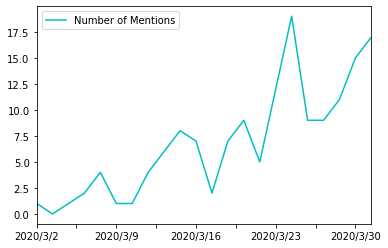

In [231]:
# With those out of the way let's plot the data to visualize the trend
coronaMentionsDF.plot(color="c")

This visualization shows us an obvious strong trend upwards in the amount of times coronavirus is mentioned. When you think back to March personally this probably aligns with how you remember the month going, with people talking about coronavirus more and more each day.

In [232]:
#APRIL
# let's do the same things we did for March here
aprilCoronaMentionsDictionary = {}
for i in range(1,31):
    date = "2020/4/"+str(i)
    aprilCoronaMentionsDictionary[date] = calculateCoronaScore(getMajorHeadlines(date))

In [233]:
aprilCoronaMentionsDF = pd.DataFrame.from_dict(aprilCoronaMentionsDictionary, orient='index')
aprilCoronaMentionsDF = aprilCoronaMentionsDF.rename(columns = {0:"Number of Mentions"}) 
# remove the weekends
aprilCoronaMentionsDF = aprilCoronaMentionsDF.drop(['2020/4/4','2020/4/5','2020/4/11','2020/4/12','2020/4/18','2020/4/19','2020/4/25','2020/4/26'])

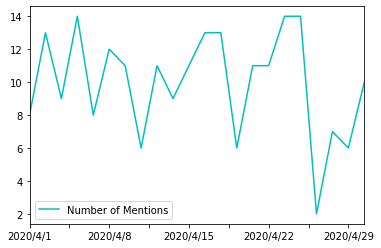

In [234]:
aprilCoronaMentionsDF.plot(color="c")

Here we see that April has seen a relatively steady amount of coronavirus mentions with no real rise or fall besides the outlier of 2 torwards the end of the month.

In [235]:
#February

febCoronaMentionsDictionary = {}
for i in range(1,30):
    date = "2020/2/"+str(i)
    febCoronaMentionsDictionary[date] = calculateCoronaScore(getMajorHeadlines(date))

In [236]:
febCoronaMentionsDictionary
febCoronaMentionsDF = pd.DataFrame.from_dict(febCoronaMentionsDictionary, orient='index')
febCoronaMentionsDF = febCoronaMentionsDF.rename(columns = {0:"Number of Mentions"}) 
# remove the weekends
febCoronaMentionsDF = febCoronaMentionsDF.drop(['2020/2/1','2020/2/2','2020/2/8','2020/2/9','2020/2/15','2020/2/16','2020/2/22','2020/2/23','2020/2/29'])

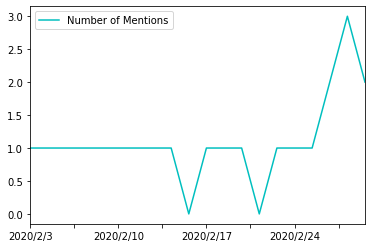

In [237]:
febCoronaMentionsDF.plot(color="c")

Here we see that coronavirus was not really on our minds in February all too much. Most days have only 1 mention of it, which when compared to recently is miniscule.

Let's look at the past 3 months all together to visualize the data better.

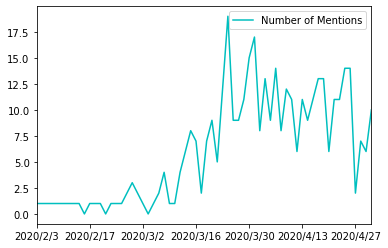

In [238]:
pastThreeMonths = pd.concat([febCoronaMentionsDF,coronaMentionsDF,aprilCoronaMentionsDF])
# pd.concat() allows us to combine the three dataframes into one so that we can plot it
pastThreeMonths.plot(color="c")
#pastThreeMonths

In [239]:
#lets look at the day with the huge spike in coronavirus mentions
printMajorHeadlines("2020/3/24")

U.N. Calls for Global Ceasefire So Countries Can Unite in Fight Against Coronavirus Pandemic

Italy’s COVID-19 Death Toll Tops 6,000 as Spain Officials Say Nearly 4,000 Health Workers Are Infected

Trump Says Country Will Be “Open for Business Very Soon” Despite Skyrocketing COVID-19 Infections

16 U.S. States Enforce Stay-at-Home Orders Amid Coronavirus Pandemic Affecting Over 40% of Population

Texas Orders Abortion Providers to Stop Performing Procedures

Texas Lt. Gov.: Elderly Should “Sacrifice” for U.S. Economy Amid Coronavirus Pandemic

Man in AZ Dies, Wife in Critical Condition, After Couple Took Chloroquine to Prevent Coronavirus Infection

ORR Refuses to Free Migrant Kids from NY Facilities Where 3 Staff Tested Positive for COVID-19

NJ Plans to Release Some 1,000 Prisoners from County Jails to Limit Spread of Coronavirus

New York Now Accounts for Around 5% of All COVID-19 Cases in the World

Puerto Rico Passes $787 Million Financial Package as Coronavirus Pandemic Further C

If you remember from earlier, on March 24th there was a huge gain in the stock market. Looking in the headlines we can infer that this headline, "U.S. Senate, Treasury Sec. Could Soon Agree to a $2 Trillion Coronavirus Relief Package", could be the main reason for this increase.

# Part 2.5: Similarity of the Media

*DISCLAIMER*

This part 2.5 consists of some code that I have copied and pasted from my INFO 2301 class. Specifically the next two code blocks are copy and pasted (with minor adjustments) from Dr. Burlinson's notes in order to do some statistical analysis. I saw this oppurtunity to combine my knowledge from 2201 and 2301 and I had to try it. If using this code from 2301 is not okay then feel free to ignore this part of my project, but I thought it was fascinating.

----

So since we just learned that lots of headlines now include coronavirus related terms, it made me wonder if headlines have become much more similiar than before the outbreak. I would imagine yes, so let's test this hypothesis.

How?

Well, we can create a bag of words for every headline on that specific day then get the term frequency vector for each headline that day. Then we will run a cosine similariy function on all the headlines to see how similiar they all are to each other. 

I would explain magnitude, dot product, and cosine similarity, but this is not a stats class. Just know that we are trying to compare how similar headlines are to each other based on their words.

In [240]:
# THIS CODE BLOCK CREATED BY DR. BURLINSON FROM INFO 2301

import string
import math
# stopwords and punctuation to help clean up your bag of words
# must remove stopwords
stopwords = set(["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"])
punctuation = set(string.punctuation)
punctuation.add("“")
punctuation.add("”")

class Headline:
    
    # Constructor: stores the values passed directly from the data file
    def __init__(self, content):
        self.content = content
    
    def getBagOfWords(self):
        cleanText = self.content # temporary variable to hold content without punctuation
        
        # remove punctuation characters 
        for char in punctuation: 
            cleanText=cleanText.replace(char,"")
        
        setOfWords = set()   #  i am creating an empty set
        for word in cleanText.split():  ## running a for loop on the clean text that i splitted up, because it was all one string
            word = word.lower()  # making every word lowercase
            if word not in stopwords: #checking to see that the word is not a stop word
                setOfWords.add(word)   # adding each word to the set, a set will only add the word if it isn't already in there
        
        
        return setOfWords # return a string without punctuation
    
    
    
    def getTermFrequencyVector(self, postBagOfWords, MasterBagOfWords):
        termFrequencyVector = []   #initializing an empty list
        for word in MasterBagOfWords:  #going through each word in the masterBagOfWords
            if word in postBagOfWords: # if the word is in postbagOfWords than we append 1
                termFrequencyVector.append(1)
            else:
                termFrequencyVector.append(0)  #otherwise we append 0
       # self.tfVector = termFrequencyVector  # assign each post a value of tfVector that contains this vector of 1's and 0's
        
    def setSimilarities(self, otherPosts):  #otherPosts would be PostList
        cosSimilarities = {}  
        for post in otherPosts:  #loop through each post
            if post != self:  #make sure the post isn't comparing with itself
                cosine = self.cos_similarity(self.tfVector, post.tfVector)
                cosSimilarities[post.id] = cosine   # create a new key/value pair in the dictionary
        self.similarityDictionary = cosSimilarities # assign this dictionary to the post object
    
    
    def getVector(self, text, wordlist):
        counts = dict.fromkeys(wordlist, 0)
        for word in text.split(" "):
            counts[word] += 1
        return list(counts.values())


    # compute the cosine similarity 
    def cos_similarity(self, v, w):
        numerator = self.dot_product(v,w)
        denominator = self.magnitude(v) * self.magnitude(w)
        return numerator/denominator
        


In [241]:
# THIS CODE BLOCK CREATED BY DR. BURLINSON
# i wont get into the detail of how the math works because it is out of the scope of this project
class Vector:
    def __init__(self, content):
        self.content = content
    
    def magnitude(self,v):
        total = 0
        for i in range(len(v)):
            total += v[i]**2
        return math.sqrt(total)
    
    # dot product of two vectors
    def dot_product(self,v, w):
        total = 0
        for i in range(len(w)):
            total += v[i]*w[i]
        return total
    
    def __len__(self):  # allows us to get the length of text
        return len(self.content)

Let's test the code to make sure it is doing what we want it to before we create a function.

In [242]:
MasterBagOfWords = set() # create an empty bag of words
HeadlineList = [] # an empty list to append with Headline objects
for headline in getMajorHeadlines("2020/4/24"):  # calling the function we previously created
    headline = headline.text
    h = Headline(headline)  # instantiating every headline as a Headline object
    HeadlineList.append(h)  # appending the Headline object
    wordList = []
   # print(headline)
    for word in h.getBagOfWords():
        MasterBagOfWords.add(word)
       # wordList.append(word)
       # print(wordList.count(word))

In [243]:
listOfSimilarities = []
totalTermFrequencyVector = [] # empty list to add with Vector objects
for h in HeadlineList:  
   # for j in HeadlineList:
      #  if j != h:  # make sure the posts aren't equal
            #listOfSimilarities.append(h.cos_similarity(h.getTermFrequencyVector(h.getBagOfWords(),MasterBagOfWords),j.getTermFrequencyVector(j.getBagOfWords(),MasterBagOfWords)))
   # print(h.getTermFrequencyVector(h.getBagOfWords(),MasterBagOfWords))
    hBag = h.getBagOfWords()
    #print(h.getTermFrequencyVector(hBag, MasterBagOfWords))
    termFrequencyVector = []   #initializing an empty list
    for word in MasterBagOfWords:  #going through each word in the masterBagOfWords
        if word in hBag: # if the word is in postbagOfWords than we append 1
            termFrequencyVector.append(1)
        else:
            termFrequencyVector.append(0)  # otherwise it doesn't appear so we append 0
    termFrequencyVector = Vector(termFrequencyVector)  # making the termFrequencyVector an instantiation of a Vector object
    totalTermFrequencyVector.append(termFrequencyVector) # appending the Vector object

In [244]:
similiarities = set() # creating an empty set. we want a set so we don't get repeating numbers 
        
for vector in totalTermFrequencyVector: # looping through the Vector objects
    for secondVector in totalTermFrequencyVector: # looping through them again so we can compare them
        if vector != secondVector:  # making sure we are not comparing the same objects
            numerator = vector.dot_product(vector.content,secondVector.content) # calling dot product function
            denominator = vector.magnitude(vector.content) * secondVector.magnitude(secondVector.content) # calling magnitude function
           
            similiarities.add(numerator/denominator)  # doing this division essentially calculates the cosine similarity
#s =            
s = pd.DataFrame(similiarities) # creating a dataframe so we can do easier calculations
s.mean(axis=0) # calling the .mean method to get the average cosine similarity from this day's headlines

0    0.137693
dtype: float64

Our code worked. Now we need to make a function so that we can compute these values for every single day in the past few months so we can compare the cosine similarities. Because the number we just got means nothing to us because we do not know what to compare it against.

In [245]:
# A good amount of this code is copy and pasted from my 2301 homework, just with altered variable names
# Also, a lot of this code is the same as the two blocks above which I have already commented, so there
# will be less comments here.

def checkHeadlineSimilarities(date): # paramter is the date we want to look at
    MasterBagOfWords = set() # empty master bag of words
    HeadlineList = []
    for headline in getMajorHeadlines(date): # going through every headline on the day
        headline = headline.text
        h = Headline(headline) # instantiating
        HeadlineList.append(h)
        for word in h.getBagOfWords():
            MasterBagOfWords.add(word) # adding every word from every headline (does not repeat because it is a set)
    
    listOfSimilarities = []
    totalTermFrequencyVector = []
    
    for h in HeadlineList:  
        hBag = h.getBagOfWords()
        termFrequencyVector = []   #initializing an empty list
        
        for word in MasterBagOfWords:  #going through each word in the masterBagOfWords
            if word in hBag: # if the word is in postbagOfWords than we append 1
                termFrequencyVector.append(1)
            else:
                termFrequencyVector.append(0)
                
        termFrequencyVector = Vector(termFrequencyVector)
        totalTermFrequencyVector.append(termFrequencyVector)
        
    similiarities = set()
    for vector in totalTermFrequencyVector:
        for secondVector in totalTermFrequencyVector:
            if vector != secondVector:
                numerator = vector.dot_product(vector.content,secondVector.content)
                denominator = vector.magnitude(vector.content) * secondVector.magnitude(secondVector.content)
             
                similiarities.add(numerator/denominator) # cosine similarity
           
    # We want to return the average cosine similarity for the day
    
    total=0
    for s in similiarities:  # going through every number in the similarities
        total += s
    if len(similiarities) >0:  # have to make sure we don't divide by 0
        return total/len(similiarities)  # this calculates the mean cosine similarity
    else:
        return 0

Great! Now let's call this function for every single day this year so we can see over time if coronavirus has made the media more similiar with its headlines.

In [246]:
# February
febSim = {} # empty dictionary to put the date and the value we get from the function
for i in range(1,30): # 29 days in february
    febSim["2020/2/"+str(i)] = checkHeadlineSimilarities("2020/2/"+str(i))  # filling in the dictionary

In [247]:
# Here's what we get:
febSim
# Again, we get a lot of 0 values from when the weekends when the website
# doesn't work. We will take these out later

{'2020/2/1': 0,
 '2020/2/2': 0,
 '2020/2/3': 0.1366984990373183,
 '2020/2/4': 0.08621020698540405,
 '2020/2/5': 0.0,
 '2020/2/6': 0.0958792627218027,
 '2020/2/7': 0.10846863635534261,
 '2020/2/8': 0,
 '2020/2/9': 0,
 '2020/2/10': 0.13431398875190667,
 '2020/2/11': 0.11032818933163335,
 '2020/2/12': 0.09128709291752768,
 '2020/2/13': 0.0629940788348712,
 '2020/2/14': 0.06681531047810609,
 '2020/2/15': 0,
 '2020/2/16': 0,
 '2020/2/17': 0.08878150771574318,
 '2020/2/18': 0.10616461764032893,
 '2020/2/19': 0.09905349760641158,
 '2020/2/20': 0.15213298752690038,
 '2020/2/21': 0.10530641966495896,
 '2020/2/22': 0,
 '2020/2/23': 0,
 '2020/2/24': 0.06804138174397717,
 '2020/2/25': 0.14337896030522945,
 '2020/2/26': 0.1153753502589939,
 '2020/2/27': 0.09142590434075447,
 '2020/2/28': 0.15124429144260593,
 '2020/2/29': 0}

In [248]:
# March
marSim = {}
for i in range(1,32):
    marSim["2020/3/"+str(i)] = checkHeadlineSimilarities("2020/3/"+str(i))

In [249]:
marSim

{'2020/3/1': 0,
 '2020/3/2': 0.11150085582436964,
 '2020/3/3': 0.1223812873888975,
 '2020/3/4': 0.09253734656617998,
 '2020/3/5': 0.11371648781320456,
 '2020/3/6': 0.13100721520007616,
 '2020/3/7': 0,
 '2020/3/8': 0,
 '2020/3/9': 0.12405704654280263,
 '2020/3/10': 0.0,
 '2020/3/11': 0.1804511233493354,
 '2020/3/12': 0.12803586365211225,
 '2020/3/13': 0.1309593933530221,
 '2020/3/14': 0,
 '2020/3/15': 0,
 '2020/3/16': 0.11088917502286033,
 '2020/3/17': 0.09483668053311432,
 '2020/3/18': 0.1347722076319845,
 '2020/3/19': 0.12839686754617716,
 '2020/3/20': 0.09914758470112746,
 '2020/3/21': 0,
 '2020/3/22': 0,
 '2020/3/23': 0.16913177838697238,
 '2020/3/24': 0.14149295876662368,
 '2020/3/25': 0.12243435773435296,
 '2020/3/26': 0.12423003044715478,
 '2020/3/27': 0.13734547047883755,
 '2020/3/28': 0,
 '2020/3/29': 0,
 '2020/3/30': 0.14681806027954886,
 '2020/3/31': 0.13911817536961363}

In [250]:
# April
aprSim = {}
for i in range(1,31):
    aprSim["2020/4/"+str(i)] = checkHeadlineSimilarities("2020/4/"+str(i))

In [251]:
aprSim

{'2020/4/1': 0.11268452494148964,
 '2020/4/2': 0.12135790339979395,
 '2020/4/3': 0.13270082811968947,
 '2020/4/4': 0,
 '2020/4/5': 0,
 '2020/4/6': 0.13350559305032245,
 '2020/4/7': 0.13277938717326068,
 '2020/4/8': 0.12327810425193117,
 '2020/4/9': 0.12785108672299797,
 '2020/4/10': 0.1297635291990131,
 '2020/4/11': 0,
 '2020/4/12': 0,
 '2020/4/13': 0.14729694919601513,
 '2020/4/14': 0.1343559669207813,
 '2020/4/15': 0.17176287663160153,
 '2020/4/16': 0.17197824797930764,
 '2020/4/17': 0.12694273897525418,
 '2020/4/18': 0,
 '2020/4/19': 0,
 '2020/4/20': 0.09863586058325459,
 '2020/4/21': 0.15879037943875365,
 '2020/4/22': 0.14699681162878403,
 '2020/4/23': 0.14598389562855554,
 '2020/4/24': 0.13769257581067926,
 '2020/4/25': 0,
 '2020/4/26': 0,
 '2020/4/27': 0.10529218448796811,
 '2020/4/28': 0.13403388912013126,
 '2020/4/29': 0.10836535416211573,
 '2020/4/30': 0.14256262066864508}

In [252]:
# Let's get January too, why not

janSim = {}
for i in range(1,32):
    janSim["2020/1/"+str(i)] = checkHeadlineSimilarities("2020/1/"+str(i))

In [253]:
janSim

{'2020/1/1': 0,
 '2020/1/2': 0.1834601224164487,
 '2020/1/3': 0.0,
 '2020/1/4': 0,
 '2020/1/5': 0,
 '2020/1/6': 0.1229138267240965,
 '2020/1/7': 0.08333333333333334,
 '2020/1/8': 0.0629940788348712,
 '2020/1/9': 0.06804138174397717,
 '2020/1/10': 0.08275546606536294,
 '2020/1/11': 0,
 '2020/1/12': 0,
 '2020/1/13': 0.08621020698540405,
 '2020/1/14': 0.06454972243679029,
 '2020/1/15': 0.07216878364870323,
 '2020/1/16': 0.12082056268487974,
 '2020/1/17': 0.09443667218324285,
 '2020/1/18': 0,
 '2020/1/19': 0,
 '2020/1/20': 0,
 '2020/1/21': 0.08983578725616455,
 '2020/1/22': 0.08653959287531819,
 '2020/1/23': 0.13415586217989436,
 '2020/1/24': 0.06681531047810609,
 '2020/1/25': 0,
 '2020/1/26': 0,
 '2020/1/27': 0.0997736380712781,
 '2020/1/28': 0.05892556509887895,
 '2020/1/29': 0.06681531047810609,
 '2020/1/30': 0.10217249428148514,
 '2020/1/31': 0.1629030173334069}

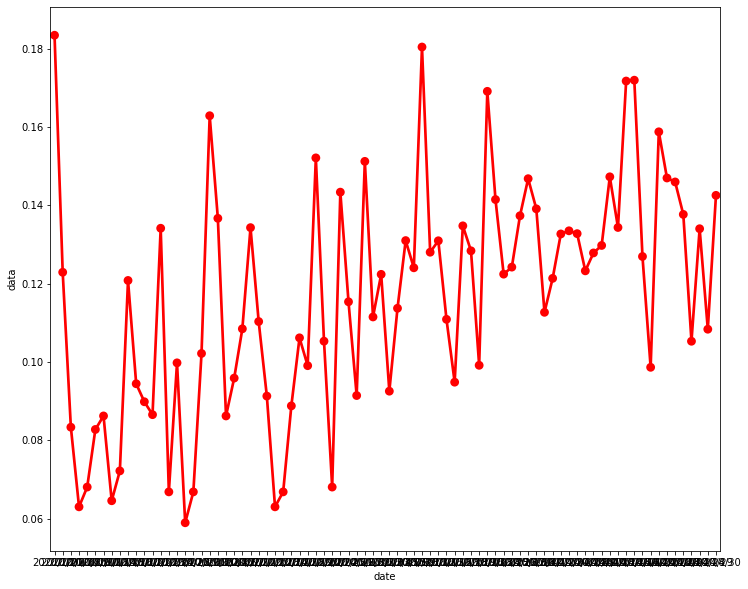

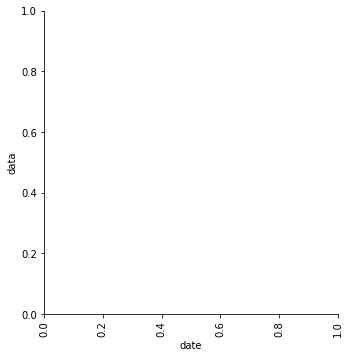

In [254]:
# Step 1: Make all of the dictionaries pandas dataframes
# Step 2: Remove all of the weekend dates where the values were 0
# Step 3: Concatenate all 4 dataframes together like we did before
# Step 4: Plot the data

janDF = pd.DataFrame.from_dict(janSim,orient='index')
janDF = janDF.drop(['2020/1/1','2020/1/3','2020/1/4','2020/1/5','2020/1/11','2020/1/12','2020/1/18','2020/1/19','2020/1/20','2020/1/25','2020/1/26'])
febDF = pd.DataFrame.from_dict(febSim,orient='index')
febDF = febDF.drop(['2020/2/1','2020/2/2','2020/2/5','2020/2/8','2020/2/9','2020/2/15','2020/2/16','2020/2/22','2020/2/23','2020/2/29'])
marDF = pd.DataFrame.from_dict(marSim,orient='index')
marDF = marDF.drop(['2020/3/1',"2020/3/7","2020/3/8","2020/3/14","2020/3/10","2020/3/15","2020/3/21","2020/3/22","2020/3/28","2020/3/29","2020/3/1"], axis=0)
aprDF = pd.DataFrame.from_dict(aprSim,orient='index')
aprDF = aprDF.drop(['2020/4/4','2020/4/5','2020/4/11','2020/4/12','2020/4/18','2020/4/19','2020/4/25','2020/4/26'])

all3 = pd.concat([janDF,febDF,marDF,aprDF])
all3 = all3.reset_index()
all3 = all3.rename(columns={"index":"date",0:"data"}) # rename the columns

# These next two lines are copy and pasted from seaborn documentation so that I could
# make the plot bigger than it was. For some reason this makes an empty plot below the
# regular plot which I cannot figure out how to remove.
fig_dims = (12, 10) 
fig, ax = plt.subplots(figsize=fig_dims)
catplot = sb.catplot(x="date",y="data",data=all3,kind='point',color="r",ax=ax).set_xticklabels(rotation=90)

Bingo! Here we see there is a genreal upwards trend of the similarity of headlines from the beginning of the year to now. My hypothesis is mostly correct, it seems that coronavirus has indeed made headlines more similar than they were before the outbreak.

# Part 3: Unemployment

Unemployment is a very important thing to look at when analyzing our economy. Let's see what we can find out.

In [255]:
# reading in a csv file from the bureau of labor statistics
unemployment = pd.read_csv("unemployment.csv")
unemployment

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2016,4.9,4.9,5.0,5.0,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
80,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.2,4.1,4.2,4.1
81,2018,4.1,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.7,3.9
82,2019,4.0,3.8,3.8,3.6,3.6,3.7,3.7,3.7,3.5,3.6,3.5,3.5


In [256]:
# Clean the data

# for some reason the csv was saved with the first 11 rows having no data, let's take those out
UE = unemployment[11:84]
# let's give the columns their rightful names that align with the dataset
UE.columns = ["Year","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
# let's set the index to the Year instead of having arbitrary numbers as our index
UE = UE.set_index("Year")
# The data is currently all in strings which prevents us from doing any analysis
# lets change the values to floats with the .astype() method
# this is a method I learned from stack overflow
UE = UE.astype(float)

In [257]:
# What if we want the average unemployment per year?
UE['Average'] = UE.mean(axis=1) # axis=1 allows us to go along the rows rather than the columns

In [258]:
# What were the top 10 years of unemployment?
UE["Average"].sort_values(ascending=False).head(10)

Year
1982    9.708333
2010    9.608333
1983    9.600000
2009    9.283333
2011    8.933333
1975    8.475000
2012    8.075000
1976    7.700000
1981    7.616667
1984    7.508333
Name: Average, dtype: float64

It looks like all of the top 10 years of unemployment were from either the 2008 financial crisis or the oil crises of the 70s/80s

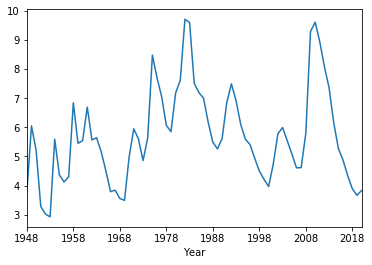

In [259]:
#let's plot the averages
UE['Average'].plot()

Unfortunately unemployment is a major topic right now because of coronavirus. At the time of making this project we do not have the official data for unemployment in April. However, accoring to many sources the projected level for April is around 12%. Let's throw in that value and visualize the plot.

In [260]:
projection = UE
projection.loc["2020","Apr"] = 12.0
projection = projection.drop(columns = ["Average"])
projection.fillna(0)
values = projection.values
projection

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1948,3.4,3.8,4.0,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4.0
1949,4.3,4.7,5.0,5.3,6.1,6.2,6.7,6.8,6.6,7.9,6.4,6.6
1950,6.5,6.4,6.3,5.8,5.5,5.4,5.0,4.5,4.4,4.2,4.2,4.3
1951,3.7,3.4,3.4,3.1,3.0,3.2,3.1,3.1,3.3,3.5,3.5,3.1
1952,3.2,3.1,2.9,2.9,3.0,3.0,3.2,3.4,3.1,3.0,2.8,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,4.9,4.9,5.0,5.0,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.2,4.1,4.2,4.1
2018,4.1,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.7,3.9


In [261]:
# create a list of the data points
myList = []
for i in values:
    for r in i:
        myList.append(r)

Text(0.5, 1.0, 'Unemployment Projection')

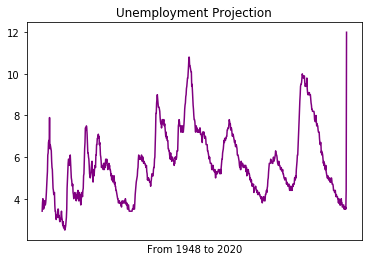

In [262]:
plt.plot(myList,color="purple")
plt.xticks([])
plt.xlabel("From 1948 to 2020")
plt.title("Unemployment Projection")

This graph (a projection) shows that we have not seen this amount of unemployment in the past 75 years.
Further research will tell you that we have not seen this level of unemployment since The Great Depression where unemployment hit almost 25%. This is still double than our projected peak.

If we want to continue projections into the future we can. The CBO, Congressional Budget Office, has released their projected quarterly unemployment rates for the next year. We can throw in this data and visualize the projected next rest of the year. Keep in mind that these are just projections.

In [263]:
twoYears = projection
# fill in the projected values (the data from the CBO was given in terms of quarters, 
# so I had to kind of average it out to put it in terms of months)
twoYears.loc["2020",["May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]] = [13.0,14.0,15.0,16.0,14.0,11.0,10.0,10.5]

Text(0.5, 1.0, 'Unemployment Extendend Projection')

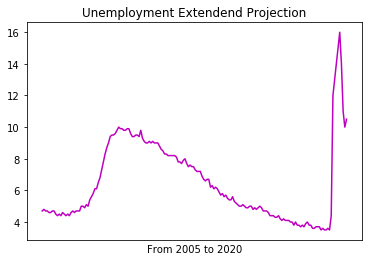

In [264]:
# Let's look at just the past 15 years so we can compare the unemployment now
# to that of the 2008 recession
values = twoYears.tail(15).values
myList = []
for i in values:
    for r in i:
        myList.append(r)
plt.plot(myList, color="m")
plt.xticks([])
plt.xlabel("From 2005 to 2020")
plt.title("Unemployment Extendend Projection")

Here we see that the projected unemployment is much worse than during the 2008 recession. Also, this visualization allows us to see how quickly the unemployment spiked due to businesses all being shut down so rapidly. This shows how quickly coronavirus has impacted the economy, specifically unemployment.

# Part 4: Coronavirus

Let's analyze coronavirus data to see if we can find some correlations between confirmed cases and the stock market.

In [265]:
# Let's grab some coronavirus data
corona = pd.read_csv("owid-covid-data.csv")
corona

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.000,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.000,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.000,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.000,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.000,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12032,ZWE,Zimbabwe,2020-04-16,23,6,3,0,1.547,0.404,0.202,0.0,NaN,NaN,NaN,NaN,NaN
12033,ZWE,Zimbabwe,2020-04-17,24,1,3,0,1.615,0.067,0.202,0.0,NaN,NaN,NaN,NaN,NaN
12034,ZWE,Zimbabwe,2020-04-18,24,0,3,0,1.615,0.000,0.202,0.0,NaN,NaN,NaN,NaN,NaN
12035,ZWE,Zimbabwe,2020-04-19,25,1,3,0,1.682,0.067,0.202,0.0,NaN,NaN,NaN,NaN,NaN


In [266]:
# Let's grab just the data from the US
corona = corona.query('iso_code == "USA"')
# Let's filter the dates down, we will do this by taking out the dates where there were no cases
corona = corona.query('total_cases > 0')
# I don't care about all the columns. Let's take only the ones we want to look at
corona = corona[["date","total_cases","new_cases","total_deaths","new_deaths"]]
# set the index to the data
corona = corona.set_index("date")
corona

,total_cases,new_cases,total_deaths,new_deaths
date,,,,
2020-01-21,1,1,0,0
2020-01-22,1,0,0,0
2020-01-23,1,0,0,0
2020-01-24,1,0,0,0
2020-01-25,2,1,0,0
...,...,...,...,...
2020-04-16,639664,30148,30985,4928
2020-04-17,671331,31667,33284,2299
2020-04-18,702164,30833,37054,3770


In [267]:
# Let's make a new column percent increase that tells us the percent increase of cases that day
corona["PercentIncrease"] = corona["new_cases"]/corona.shift(1)["total_cases"]
# we have to use .shift(1) to get the value of "total_cases" from the previous day in the dataset
corona["PercentIncrease"] = corona["PercentIncrease"].fillna(0) # removes NaN

In [268]:
# Let's see what days had the biggest percentage increases in cases
topIncrease = pd.DataFrame(corona["PercentIncrease"].sort_values(ascending=False).head(31))
topIncrease

,PercentIncrease
date,
2020-01-27,1.500000
2020-02-22,1.187500
2020-01-25,1.000000
2020-02-25,0.514286
2020-03-20,0.513542
2020-03-06,0.465409
2020-03-19,0.464914
2020-03-07,0.450644
2020-03-18,0.378889


In [269]:
topIncrease = topIncrease.reset_index()

In [270]:
marchCount = 0
for date in topIncrease["date"]:
    if date[0:7] == "2020-03":
        marchCount += 1
print("Of the top 31 days with the biggest percentage increase, {} of those days were in March."
      .format(marchCount))

Of the top 31 days with the biggest percentage increase, 25 of those days were in March.


Here we see that almost all of the days with the greatest percent increase of cases were in March. March was also the month where the stock market did terribly. Perhaps with the outbreak happening quickly investors started to panic and sold. However, recently as things have slowed down, in terms of percentage increase of the virus, investors have regained confidence and the market is doing well.

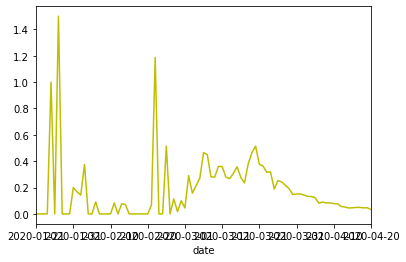

In [271]:
# While we are here...
# This percent increase will also tell us if we have "flattened the curve"
corona["PercentIncrease"].plot(color="y")
# looks like we have to some extent (although this data only goes to 4/20, so it
# is not entirely up to date)

Are there any correlations between coronavirus cases and the stock market?
To see this let's make some scatterplots

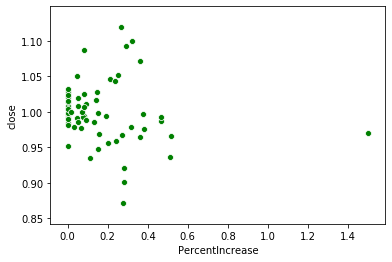

In [272]:
# correlation between percentage increase of coronavirus and change in AAPL's closing price by day
sb.scatterplot(x=corona["PercentIncrease"], y=(aapldf["close"]/aapldf.shift(1)["close"]),color="g")

No correlation.

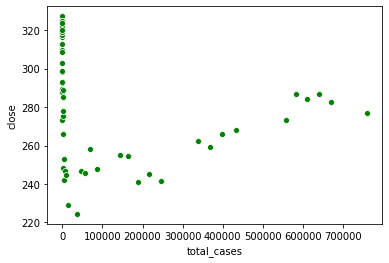

In [273]:
sb.scatterplot(x=corona["total_cases"], y=(aapldf["close"]),color="g")

While this kind of looks like a correlation, it really isn't one becuase it is basically saying that as we see more coronavirus cases AAPL's stock increases, which doesn't make any sense. Effectively we can can conclude that there is not much correlation betweeen coronavirus cases in the US in the economy.

Text(0.5, 1.0, '1/21 to 2/29')

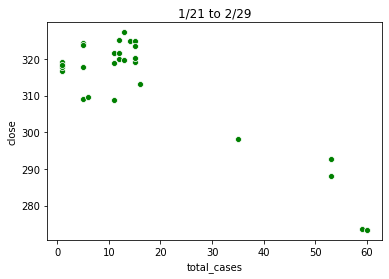

In [274]:
# Maybe if we look at the beginning of coronavirus cases there will be more of a greater correlation

sb.scatterplot(x=corona.head(40)["total_cases"],y=aapldf["close"],color="g").set_title("1/21 to 2/29")

This is the closest I have gotten to trying to show some correlation (in this case a negative correlation). This does show that in the beginning that when US cases increased from 15 to 30 to 60 Apple's stock did decrease. However, if we are to be a data scientist, this is not very impressive considering there are really only 5 data points that show this negative correlation, because if we were to add more dates the correlation would quickly dissolve.

# Part 5: Conclusion

So what have we learned?

1. The stock market initally was hit hard by coronavirus but quickly bounced back, having a great April
2. Media headlines have become more similar due to the virus
3. Unemployment projections show how badly our economy has been hit, not the stock market; the two have behaved very differently
4. To my surprise, besides the initial increase of cases in March, the number of coronavirus cases increasing throughout April has not impacted the stock market. This really shows that the stock market is not "rational".